# Resolución numérica de ecuaciones no lineales

In [3]:
%reload_ext version_information
%version_information numpy, matplotlib, sympy

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.8.2 64bit [GCC 9.2.1 20200130]
IPython 7.13.0
OS Linux 5.5.13 1 MANJARO x86_64 with glibc2.2.5
numpy 1.18.2
matplotlib 3.2.1
sympy 1.5.1
Sun May 10 17:02:32 2020 CEST

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
from decimal import *

In [3]:
mporig = getcontext().prec
mporig  # Esta sería la precisión con la que se trabaja por defecto

28

## Ejercicio 1

Demuestre que la ecuación  $x^3+4 x^2=10$  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha
raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para
conseguir 5 cifras decimales exactas?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado
hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

In [5]:
x = sp.symbols('x')
def f(x):
    return x**3+4*x**2-10
# Vemos los valores en los extremos del intervalo
[f(1),f(2)]

[-5, 14]

Por el Teorema de Bolzano, sabemos que habrá al menos una raíz en $]1,2[$. Como además $f(x)$ es claramente creciente en el intervalo, podemos asegurar que tendrá una única raíz en ese intervalo.

In [5]:
def biseccion(a0,b0,cifras,n):
    niter = n + 1
    a = a0
    b = b0
    c = (a+b)/2
    prec = 10**(-cifras)
    if (abs(f(c))>prec):
        if (np.sign(f(a))==np.sign(f(c))):
            a = c
            res = biseccion(a,b,cifras,niter)
            c = res[0]
            niter = res[1]
        if (np.sign(f(b))==np.sign(f(c))):
            b = c
            res = biseccion(a,b,cifras,niter)
            c = res[0]
            niter = res[1]
    return [c,niter]

sol = biseccion(1,2,3,0)[0]
sol

1.36517333984375

In [6]:
n_iter_cinco = biseccion(1,2,5,0)[1]
n_iter_cinco

20

In [7]:
def df(x):
    return 3*x**2+8*x
def newton_raphson(x_n,cifras):
    siguiente = x_n - (f(x_n)/df(x_n))
    prec = 10**(-cifras)
    error = x_n - siguiente
    if (abs(error)>prec):
        siguiente = newton_raphson(siguiente,cifras)
    return siguiente
sol_nr = newton_raphson(2,3)
sol_nr

1.3652300139161466

## Ejercicio 2

Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos, usando el algoritmo de bisección.

Para resolver el ejercicio tomamos la función $x-25^{^1_3}=0$, y le aplicamos el método de bisección. Como la raíz cúbica de 27 es 3 y 2 es la raíz cúbica de 8, tomamos el intervalo $[2,3]$.

In [8]:
def f(x):
    return x-25**(1./3.)

sol = biseccion(2,3,2,0)[0]
sol

2.921875

## Ejercicio 3

3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con precisión $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10 cos x+x=0$.

In [9]:
def f(x):
    return x**3-x-1
def df(x):
    return 3*x**2-1

sol_i = newton_raphson(1,5)
sol_i

1.3247179572447898

/usr/lib/python3.8/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/usr/lib/python3.8/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


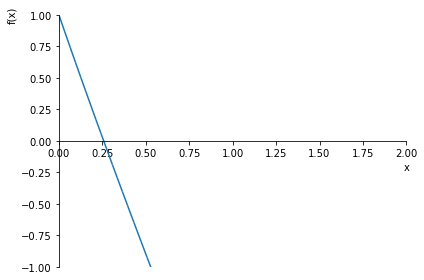

In [10]:
def f(x):
    return x**2-3*x-sp.exp(x)+2
def df(x):
    return 2*x-3-sp.exp(x)
a = 0
b = 2
sp.plot(f(x),(x,a,b),ylim= [-1.0, 1.0])

In [11]:
sol_ii = newton_raphson(0.5,5)
sol_ii

0.257530285439682

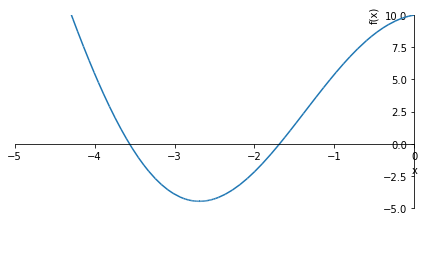

In [12]:
def f(x):
    return x**2+x+10*sp.cos(x)
def df(x):
    return 2*x+1-10*sp.sin(x)
a = -5
b = 0
sp.plot(f(x),(x,a,b),ylim= [-10.0, 10.0])

In [13]:
sol_iii = newton_raphson(-1.5,5)
sol_iii

-1.68693989979647

## Ejercicio 4

4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos, y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$,
partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

In [79]:
def f(x):
    return 3*x**2+sp.exp(x)-1
sol_i = biseccion(0,1,4,0)
[sol_i[0],sol_i[1]]

[6.103515625e-05, 14]

In [80]:
def df(x):
    return 6*x+sp.exp(x)

def newton_raphson2(x_n,cifras,suc):
    siguiente = x_n - f(x_n)/df(x_n)
    suc.append(siguiente)
    prec = 10**(-cifras)
    error = x_n - siguiente
    if (abs(error)>prec):
        newton_raphson2(siguiente,cifras,suc)
    niter = len(suc)
    return [suc[niter-1],niter]

suc = []
sol_ii = newton_raphson2(0,4,suc)
[sol_ii[0],sol_ii[1]]

[0, 1]

## Ejercicio 5

Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.


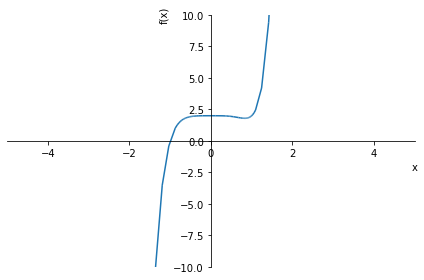

[ 1.06110281+0.37638405j  1.06110281-0.37638405j  0.15199934+1.01945595j
  0.15199934-1.01945595j -0.71310215+0.98823189j -0.71310215-0.98823189j
 -1.        +0.j        ]


In [16]:
def fi(x):
    return x**7-x**4+2
a = -5
b = 5
sp.plot(fi(x),(x,a,b),ylim= [-10.0, 10.0])
coefs_fi = [1,0,0,-1,0,0,0,2]
print(np.roots(coefs_fi))

Viendo la gráfica y las raíces del polinomio, podemos ver que el único punto donde se anula en $\mathbb{R}$ es en $x=-1$.

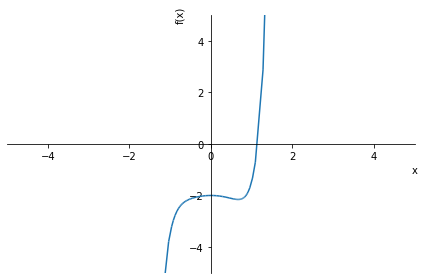

1.14545980727001


In [17]:
def fii(x):
    return x**7+sp.cos(x)-3
a = -5
b = 5
sp.plot(fii(x),(x,a,b),ylim= [-5.0, 5.0])
sol_ii = sp.nsolve(fii(x),x,2)
print(sol_ii)

Viendo la gráfica de la función, obtenemos el valor real aproximado de la raíz.

## Ejercicio 6

Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen a las sucesiones obtenidas para los distintos métodos
programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [39]:
def f(x):
    return x**3+1/8*x**2-2*x

def df(y): 
    return sp.diff(f(x),x).subs(x,y)

def g(x):
    return x - f(x)

f(x)

x**3 + 0.125*x**2 - 2*x

In [40]:
sols = sp.solve(f(x),x)
sols

[-1.47809395661327, 0.0, 1.35309395661327]

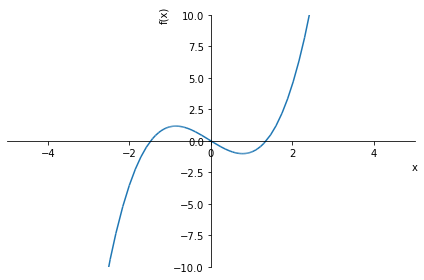

In [41]:
a = -5
b = 5
sp.plot(f(x),(x,a,b),ylim= [-10.0, 10.0])

In [48]:
# Bisección con iteraciones
def biseccion2(a0,b0,cifras,suc):
    a = a0
    b = b0
    c = (a+b)/2
    suc.append(c)
    prec = 10**(-cifras)
    if (abs(f(c))>prec):
        if (np.sign(f(a))==np.sign(f(c))):
            a = c
            biseccion2(a,b,cifras,suc)
        if (np.sign(f(b))==np.sign(f(c))):
            b = c
            biseccion2(a,b,cifras,suc)
    return suc

# Newton-Raphson con iteraciones
def newton_raphson_it(x_n,cifras,suc):
    siguiente = x_n - f(x_n)/df(x_n)
    suc.append(siguiente)
    prec = 10**(-cifras)
    error = x_n - siguiente
    if (abs(error)>prec):
        newton_raphson_it(siguiente,cifras,suc)
    return suc


# Aitken
def aitken(aprox):
    k = 0
    n = len(aprox)
    ait = []
    for k in range(n-2):
        aproxacel = aprox[k]-(aprox[k+1]-aprox[k])**2/(aprox[k+2]-2*aprox[k+1]+aprox[k])
        ait.append(aproxacel);
    return ait

# Steffensen
def steffensen(suc,sol):
    aprox = [suc[i] for i in range(len(suc))]
    stef = [1]
    while (abs(sol - stef[len(stef)-1]) > 10**(-5)):
        v0 = aprox[0]-(aprox[1]-aprox[0])**2/(aprox[2]-2*aprox[1]+aprox[0])
        v1 = g(v0)
        v2 = g(v1)
        stef.append(v0)
        aprox.clear()
        aprox.append(v0)
        aprox.append(v1)
        aprox.append(v2)
    stef.pop(0)
    return stef

**Bisección**

In [50]:
ite = []
sol_b = biseccion2(-2,-0.5,5,ite)
sol_ait = aitken(sol_b)
sol_stef = steffensen(sol_b,sols[0])
print("Bisección:\n",sol_b)
print("Aitken:\n",sol_ait)
print("Steffensen:\n",sol_stef)

Bisección:
 [-1.25, -1.625, -1.4375, -1.53125, -1.484375, -1.4609375, -1.47265625, -1.478515625, -1.4755859375, -1.47705078125, -1.477783203125, -1.4781494140625, -1.47796630859375, -1.478057861328125, -1.4781036376953125, -1.4780807495117188, -1.4780921936035156]
Aitken:
 [-1.5, -1.5, -1.5, -1.4375, -1.46875, -1.484375, -1.4765625, -1.4765625, -1.478515625, -1.478515625, -1.47802734375, -1.47802734375, -1.4781494140625, -1.47808837890625, -1.47808837890625]
Steffensen:
 [-1.5, -1.4764069796018677, -1.4780846719666263]


**Newton-Raphson**

In [55]:
ite = []
sol_b = newton_raphson_it(-2,10,ite)
sol_ait = aitken(sol_b)
sol_stef = steffensen(sol_b,sols[0])
print("Newton-Raphson:\n",sol_b)
print("Aitken:\n",sol_ait)
print("Steffensen:\n",sol_stef)

Newton-Raphson:
 [-1.63157894736842, -1.49758894442811, -1.47847351807331, -1.47809410487718, -1.47809395661329, -1.47809395661327]
Aitken:
 [-1.47529266173776, -1.47808642157913, -1.47809395655533, -1.47809395661327]
Steffensen:
 [-1.47529266173776, -1.47806844289866, -1.47809395447863]


**Regula-Falsi**

In [60]:
def regula_falsi(a0,b0,cifras,suc):
    a = a0
    b = b0
    c = b - ((a-b)*f(b))/(f(a)-f(b))
    suc.append(c)
    prec = 10**(-cifras)
    if (abs(f(c))>prec):
        if (np.sign(f(a))==np.sign(f(c))):
            a = c
            biseccion2(a,b,cifras,suc)
        if (np.sign(f(b))==np.sign(f(c))):
            b = c
            biseccion2(a,b,cifras,suc)
    return suc

In [68]:
ite = []
sol_b = regula_falsi(-2,-1,4,ite)
sol_ait = aitken(sol_b)
sol_stef = steffensen(sol_b,sols[0])
print("Regula-Falsi:\n",sol_b)
print("Aitken:\n",sol_ait)
print("Steffensen:\n",sol_stef)

Bisección:
 [-1.2432432432432432, -1.6216216216216215, -1.4324324324324325, -1.527027027027027, -1.4797297297297298, -1.4560810810810811, -1.4679054054054055, -1.4738175675675675, -1.4767736486486487, -1.4782516891891893, -1.4775126689189189, -1.477882179054054, -1.4780669341216215, -1.4781593116554053, -1.4781131228885134]
Aitken:
 [-1.4954954954954953, -1.4954954954954955, -1.4954954954954955, -1.4324324324324322, -1.463963963963964, -1.4797297297297294, -1.47972972972973, -1.4797297297297298, -1.477759009009009, -1.477759009009009, -1.478251689189189, -1.478251689189189, -1.478128519144144]
Steffensen:
 [-1.4954954954954953, -1.477044818270447, -1.4780903585596066]


**Secante**

In [69]:
def secante(x0,x1,cifras,suc):
    x2 = x1 - (x1-x0)/(f(x1)-f(x0))*f(x1)
    suc.append(x2)
    prec = 10**(-cifras)
    error = x1 - x2
    if (abs(error)>prec):
        secante(x1,x2,cifras,suc)
    return suc

In [73]:
ite = []
sol_b = secante(-3,-2,5,ite)
sol_ait = aitken(sol_b)
sol_stef = steffensen(sol_b,sols[0])
print("Secante:\n",sol_b)
print("Aitken:\n",sol_ait)
print("Steffensen:\n",sol_stef)

Secante:
 [-1.786259541984733, -1.577802536130012, -1.5019409305972014, -1.4803222819754862, -1.478147560363659, -1.4780940793905468, -1.4780939566200424]
Aitken:
 [-1.458538345137645, -1.471706122480435, -1.4779043268807033, -1.4780927310218457, -1.478093956337563]
Steffensen:
 [-1.458538345137645, -1.4769120028975646, -1.4780893917800675]


**Whittacker**

In [78]:
def whittacker(x0,m,cifras,suc):
    x1 = x0 - f(x0)/m
    suc.append(x1)
    prec = 10**(-cifras)
    error = x0 - x1
    if (abs(error)>prec):
        whittacker(x1,m,cifras,suc)
    return suc

In [82]:
ite = []
sol_b = whittacker(-1.5,3,5,ite)
sol_ait = aitken(sol_b)
sol_stef = steffensen(sol_b,sols[0])
print("Whittacker:\n",sol_b)
print("Aitken:\n",sol_ait)
print("Steffensen:\n",sol_stef)

Whittacker:
 [-1.46875, -1.481658935546875, -1.4766678022952817, -1.4786542537001146, -1.4778722327615903, -1.4781814493124688, -1.4780593929495824, -1.4781076047994173, -1.4780885663960854, -1.4780960852792344]
Aitken:
 [-1.4780594958924198, -1.478088730044285, -1.478093133197803, -1.4780938287200076, -1.4780939366346726, -1.4780939534993458, -1.4780939561274895, -1.4780939565375104]
Steffensen:
 [-1.4780594958924198, -1.4780939527191082]


## Ejercicio 7

 Programar el método de Newton-Raphson acelerado para el caso de una raíz múltiple de una ecuación y comparar los resultados con los que se obtienen mediante el empleo de los métodos de aceleración anteriores.

In [109]:
def f(x):
    return 1/4*x**2-x-1

def df(y): 
    return sp.diff(f(x),x).subs(x,y)

def g(x):
    return x - f(x)

f(x)

0.25*x**2 - x - 1

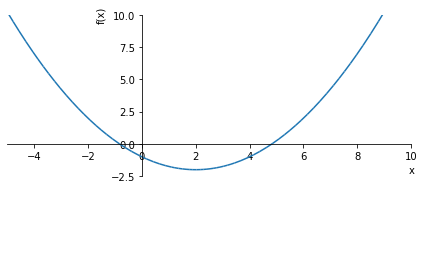

In [116]:
a = -5
b = 10
sp.plot(f(x),(x,a,b),ylim= [-10.0, 10.0])

In [125]:
sols = sp.solve(f(x),x)
sols

[-0.828427124746190, 4.82842712474619]

In [126]:
def newton_raphson_acelerado(x0,m,cifras,suc):
    x1 = x0 - m*f(x0)/df(x0)
    suc.append(x1)
    prec = 10**(-cifras)
    error = x0 - x1
    if (abs(error)>prec):
        newton_raphson_acelerado(x1,m,cifras,suc)
    return suc

In [137]:
ite = []
sol_b = newton_raphson_acelerado(4,1.5,3,ite)
sol_ait = aitken(newton_raphson_it(4,3,ite))
sol_stef = steffensen(newton_raphson_it(4,3,ite),sols[1])
print("Newton-Raphson acelerado:\n",sol_b)
print("Aitken (Sobre NR):\n",sol_ait)
print("Steffensen (Sobre NR):\n",sol_stef)

Newton-Raphson acelerado:
 [5.50000000000000, 4.58928571428571, 4.96456280788177, 4.76504789801568, 4.86120630143795, 4.81231918537404, 4.83655028973702, 4.82438298927341, 4.83045353547496, 4.82741500746020, 4.82893345511656, 4.82817402752932, 5.00000000000000, 4.83333333333333, 4.82843137254902, 4.82842712474938, 5.00000000000000, 4.83333333333333, 4.82843137254902, 4.82842712474938]
Aitken (Sobre NR):
 [4.85504971219257, 4.83430112182379, 4.82993381882569, 4.82879642731514, 4.82852019251609, 4.82845028841130, 4.82843292789657, 4.82842857396292, 4.82842748724411, 4.82842721534629, 4.82893011340712, 4.91539649975423, 4.82828282828283, 4.82842712106525]
Steffensen (Sobre NR):
 [4.85504971219257, 4.82837453626669, 4.82842712454369]


## Ejercicio 8

Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del
desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo.

In [85]:
def p(x):
    return 5*x**7+4*x**6+6*x**5+3*x**4+7*x**3+4*x**2+5*x+1
coefs_px = [5,4,6,3,7,4,5,1]
p(x)

5*x**7 + 4*x**6 + 6*x**5 + 3*x**4 + 7*x**3 + 4*x**2 + 5*x + 1

In [11]:
def horner(coefs,x0):
    b_n = [coefs[0]]
    k = 1
    for k in range(1,len(coefs)):
        b = coefs[k] +b_n[k-1]*x0
        b_n.append(b)
    return b_n[len(b_n)-1]
print("Valor para x=0: ",horner(coefs_px,0))
print("Valor para x=2: ",horner(coefs_px,2))
print("Valor para x=-1: ",horner(coefs_px,-1))

Valor para x=0:  5
Valor para x=2:  429
Valor para x=-1:  33


In [87]:
def dp(x):
    return 35*x**6+24*x**5+30*x**4+12*x**3+21*x**2+8*x+5
coefs_dpx = [35,24,30,12,21,8,5]
dp(x)

35*x**6 + 24*x**5 + 30*x**4 + 12*x**3 + 21*x**2 + 8*x + 5

In [12]:
print("Raíces de p(x): ",np.roots(coefs_px))
def newton_raphson_pol(x_n,coefs_f,coefs_d):
    siguiente = x_n - (horner(coefs_f,x_n)/horner(coefs_d,x_n))
    prec = 10**(-5)
    error = x_n - siguiente
    if (abs(error)>prec):
        siguiente = newton_raphson_pol(siguiente,coefs_f,coefs_d)
    return siguiente
print("Aproximación con Newton-Raphson: ",newton_raphson_pol(0,coefs_px,coefs_dpx))

Raíces de p(x):  [-5.89940936+0.j         -0.58250628+0.77098492j -0.58250628-0.77098492j
  0.73750883+0.60111992j  0.73750883-0.60111992j  0.29470213+0.95699252j
  0.29470213-0.95699252j]
Aproximación con Newton-Raphson:  -5.899409361191095
